In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
#sns.set()

#import scipy as sp
#from sklearn.linear_model import LinearRegression

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 90)

#import statsmodels.api as sm
#import statsmodels.stats.api as sms
#rom scipy import stats


In [2]:
df = pd.read_csv('Ames_HousePrice.csv')
df.shape

(2580, 82)

In [3]:
len(df.columns)

82

In [4]:
df = df.drop(['Unnamed: 0', 'PID'], axis=1)
df.shape

(2580, 80)

In [5]:
df.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pav

In [6]:
len(df.columns)

80

In [7]:
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
              'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
              'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
              'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
              'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

print(len(categorical))
df[categorical].head(2)

48


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,30,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,3,2010,WD,Normal
1,120,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,2,2009,WD,Normal


In [8]:
df[categorical].shape

(2580, 48)

In [9]:
df[categorical].isna().sum().sum()

11639

In [10]:
numeric = ['GrLivArea', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
           'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
           'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
           'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
           'ScreenPorch', 'PoolArea', 'MiscVal']

print(len(numeric))
df[numeric].head(2)

31


,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,856,NaN,7890,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1049,42.0,4235,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0


In [11]:
df[numeric].shape

(2580, 31)

In [12]:
df[numeric].isna().sum().sum()

615

In [13]:
target = ['SalePrice']

print(len(target))
df[target].head(2)

1


,SalePrice
0,126000
1,139500


In [14]:
df[target].shape

(2580, 1)

In [15]:
df[target].isna().sum()

SalePrice    0
dtype: int64

In [16]:
len(categorical) + len(numeric) + len(target)

80

In [17]:
data = {'Count':[48, 31],
        'Total Values':[123840, 79980],
        'Missing Values':[11639, 615]}

eda = pd.DataFrame(data, index=['Categorical', 'Numeric'])

eda

,Count,Total Values,Missing Values
Categorical,48,123840,11639
Numeric,31,79980,615


In [18]:
eda['% Missing'] = eda['Missing Values'] / eda['Total Values']

In [19]:
eda['Not Missing'] = eda['Total Values'] - eda['Missing Values']

In [20]:
eda

,Count,Total Values,Missing Values,% Missing,Not Missing
Categorical,48,123840,11639,0.093984,112201
Numeric,31,79980,615,0.007689,79365


In [21]:
eda.index

Index(['Categorical', 'Numeric'], dtype='object')

<Figure size 576x288 with 0 Axes>

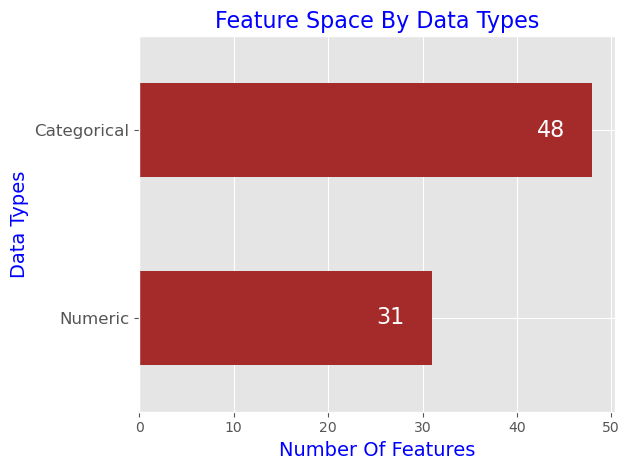

In [22]:
plt.figure(figsize=(8,4))
plt.style.use('default')
plt.style.use('ggplot')

ax = eda[['Count']].sort_values('Count').plot.barh(color='brown', legend=False)
ax.bar_label(ax.containers[0], fontsize=16, padding=-40, color='white')

plt.title('Feature Space By Data Types', fontsize=16, color='blue')
plt.xlabel('Number Of Features', fontsize=14, color='blue')
plt.ylabel('Data Types', fontsize=14, color='blue')
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show();

<Figure size 800x400 with 0 Axes>

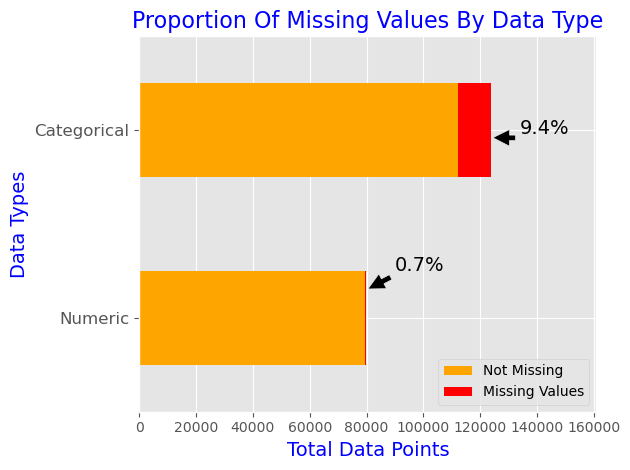

In [23]:
plt.figure(figsize=(8,4))
plt.style.use('default')
plt.style.use('ggplot')

#y=np.arange(len())

eda[['Not Missing', 'Missing Values']].sort_values('Not Missing').plot.barh(stacked=True, 
                                                                                color={'Not Missing':'Orange',
                                                                                       'Missing Values':'Red'})
plt.title('Proportion Of Missing Values By Data Type', fontsize=16, color='blue')
plt.xlabel('Total Data Points', fontsize=14, color='blue')
plt.ylabel('Data Types', fontsize=14, color='blue')

#plt.text(112200, 0.98, '9.4%', fontsize=10)

plt.annotate('9.4%', xy=(124000, 0.96), xytext=(134000, 0.98),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

plt.annotate('0.7%', xy=(80000, 0.15), xytext=(90000, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

plt.margins(x=0.3)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show();

<Figure size 800x400 with 0 Axes>

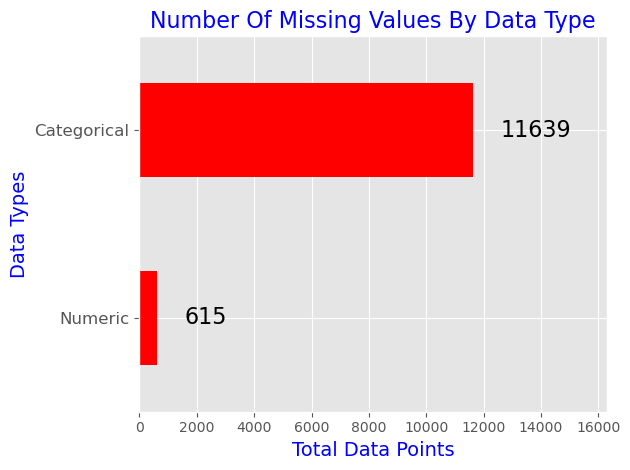

In [24]:
plt.figure(figsize=(8,4))
plt.style.use('default')
plt.style.use('ggplot')

#y=np.arange(len())

ax = eda[['Missing Values']].sort_values('Missing Values').plot.barh(color='red', legend=False)
ax.bar_label(ax.containers[0], fontsize=16, padding=+20, color='black')


plt.title('Number Of Missing Values By Data Type', fontsize=16, color='blue')
plt.xlabel('Total Data Points', fontsize=14, color='blue')
plt.ylabel('Data Types', fontsize=14, color='blue')

plt.margins(x=0.4)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show();

In [25]:
df[categorical].isna().sum().sum()

11639

In [26]:
len(df[categorical].isna().sum(axis=0).sort_values(ascending=False))

48

In [27]:
df[categorical].isna().sum(axis=0).sort_values(ascending=False).head(20)

PoolQC          2571
MiscFeature     2483
Alley           2412
Fence           2055
FireplaceQu     1241
GarageFinish     129
GarageCond       129
GarageQual       129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtCond          69
BsmtFinType1      69
BsmtQual          69
MasVnrType        14
Electrical         1
PavedDrive         0
MoSold             0
YrSold             0
SaleType           0
dtype: int64

In [28]:
df[numeric].isna().sum()

GrLivArea          0
LotFrontage      462
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        14
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      129
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   SalePrice      2580 non-null   int64  
 2   MSSubClass     2580 non-null   int64  
 3   MSZoning       2580 non-null   object 
 4   LotFrontage    2118 non-null   float64
 5   LotArea        2580 non-null   int64  
 6   Street         2580 non-null   object 
 7   Alley          168 non-null    object 
 8   LotShape       2580 non-null   object 
 9   LandContour    2580 non-null   object 
 10  Utilities      2580 non-null   object 
 11  LotConfig      2580 non-null   object 
 12  LandSlope      2580 non-null   object 
 13  Neighborhood   2580 non-null   object 
 14  Condition1     2580 non-null   object 
 15  Condition2     2580 non-null   object 
 16  BldgType       2580 non-null   object 
 17  HouseStyle     2580 non-null   object 
 18  OverallQ

In [30]:
df.describe(include='all')

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2580.000000,2580.000000,2580.000000,2580,2118.000000,2580.000000,2580,168,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580.000000,2580.000000,2580.000000,2580.000000,2580,2580,2580,2580,2566,2566.000000,2580,2580,2580,2511,2511,2509,2511,2579.000000,2510,2579.000000,2579.000000,2579.000000,2580,2580,2580,2579,2580.000000,2580.000000,2580.000000,2578.000000,2578.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580,2580.000000,2580,2580.000000,1339,2453,2451.000000,2451,2579.000000,2579.000000,2451,2451,2580,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,9,525,97,2580.000000,2580.000000,2580.000000,2580,2580
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,2,5,3,28,9,8,5,8,NaN,NaN,NaN,NaN,6,7,15,16,4,NaN,4,5,6,5,5,4,6,NaN,6,NaN,NaN,NaN,6,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,4,4,NaN,NaN,NaN,10,6
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,CBlock,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,TA,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,NaN,2008,NaN,NaN,2570,105,1641,2337,2578,1886,2458,410,2228,2555,2139,1288,NaN,NaN,NaN,NaN,2059,2544,868,856,1559,NaN,1636,2232,1140,1166,2316,1708,753,NaN,2180,NaN,NaN,NaN,2540,1293,2417,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1358,NaN,2399,NaN,619,1527,NaN,1112,NaN,NaN,2312,2356,2336,NaN,NaN,NaN,NaN,NaN,NaN,3,301,88,NaN,NaN,NaN,2392,2414
mean,1486.039922,178059.623256,57.691860,NaN,68.516053,10120.153488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.046124,5.618605,1970.313953,1983.751938,NaN,NaN,NaN,NaN,NaN,99.308262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444.346258,NaN,53.238852,539.101590,1036.686700,NaN,NaN,NaN,NaN,1144.975194,336.820155,4.244574,0.435221,0.062064,1.550775,0.378295,2.850388,1.04031,NaN,6.387209,NaN,0.604264,NaN,NaN,1976.982048,NaN,1.747577,466.842575,NaN,NaN,NaN,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,NaN,NaN,NaN,48.731395,6.150775,2007.838372,NaN,NaN
std,488.650181,75031.089374,42.802105,NaN,22.835831,8126.937892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.367590,1.122008,29.719705,20.490242,NaN,NaN,NaN,NaN,NaN,175.872330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429.334957,NaN,174.423920,425.199639,418.555417,NaN,NaN,NaN,NaN,375.958955,424.072452,44.403603,0.518827,0.244513,0.545825,0.499237,0.822863,0.20255,NaN,1.535186,NaN,0.648604,NaN,NaN,24.659801,NaN,0.738678,207.476842,NaN,NaN,NaN,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,NaN,NaN,NaN,498.725058,2.670647,1.312333,NaN,NaN
min,334.000000,12789.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,2.000000,NaN,0.000000,NaN,NaN,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.0

In [31]:
df.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2580,2580,168,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2566,2580,2580,2580,2511,2511,2509,2511,2510,2580,2580,2580,2579,2580,2580,1339,2453,2451,2451,2451,2580,9,525,97,2580,2580
unique,7,2,2,4,4,2,5,3,28,9,8,5,8,6,7,15,16,4,4,5,6,5,5,4,6,6,6,5,2,4,5,7,5,6,3,5,5,3,4,4,4,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,TA,MnPrv,Shed,WD,Normal
freq,2008,2570,105,1641,2337,2578,1886,2458,410,2228,2555,2139,1288,2059,2544,868,856,1559,1636,2232,1140,1166,2316,1708,753,2180,2540,1293,2417,2365,1358,2399,619,1527,1112,2312,2356,2336,3,301,88,2392,2414
